# Chapter 4 Hypothesis testing

## Example 4.3 Two samples

Test the difference of two means. The box-plot is not helpful.

ans =
  Columns 1 through 7
    0.5377    1.8339   -2.2588    0.8622    0.3188   -1.3077   -0.4336
  Columns 8 through 14
    0.3426    3.5784    2.7694   -1.3499    3.0349    0.7254   -0.0631
  Columns 15 through 21
    0.7147   -0.2050   -0.1241    1.4897    1.4090    1.4172    0.6715
  Columns 22 through 26
   -1.2075    0.7172    1.6302    0.4889    1.0347
ans =
  Columns 1 through 7
    1.0815    0.2572    0.7351   -0.1298    1.2107   -0.4177   -0.3551
  Columns 8 through 14
   -0.1476   -1.8554    1.6507    0.7602   -0.1039    1.5962   -0.8692
  Column 15
    0.4182
grp =
  Columns 1 through 13
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 14 through 26
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 27 through 39
     2     2     2     2     2     2     2     2     2     2     2     2     2
  Columns 40 through 41
     2     2


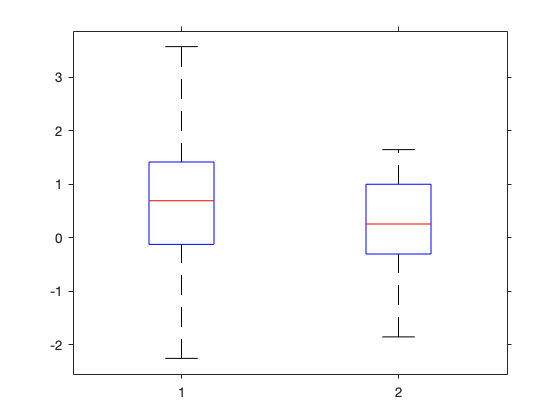

In [1]:
rng = 123;
x = normrnd(0, 1, [26,1]);
y = normrnd(0.5, 0.8, [15,1]);
x'
y'

grp = [ones(1, 26), ones(1, 15)*2];
grp
boxplot([x;y], grp)

### Example 4.11 Binomial Test
Power function $p \mapsto P_p(X \ge 59)$.

In [2]:
pow_bin = @(p) 1 - binocdf(59, 100, p)

pow_bin =
  function_handle with value:
    @(p)1-binocdf(59,100,p)


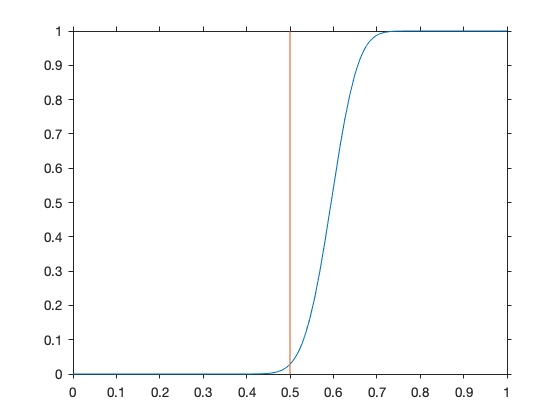

In [3]:
fplot(pow_bin, [0,1])
vline(0.5, '-')

### Figure 4.4 
The function $x \mapsto P_{0.5}(X\ge x)$ for $X \sim Bin(100, 0.5)$.

In [4]:
bino = @(x)  1 - binocdf(x, 100, 0.5);

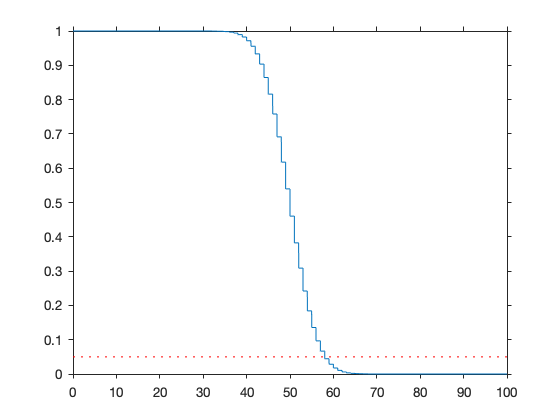

In [5]:
fplot(bino, [0, 100])

hline(0.05)

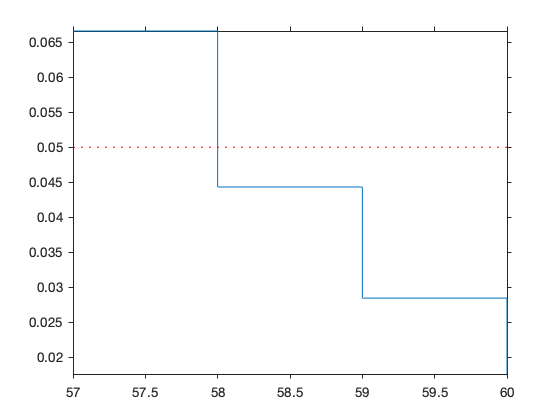

In [6]:
fplot(bino, [57, 60])

hline(0.05)

### Figure 4.5 Power function for the Gauss test
- Red. One sided test $H_0: \mu \le 0$ vs $H_1: \mu > 0$
- Blue. One sided test $H_0: \mu \ge 0$ vs $H_1: \mu < 0$
- Yellow. Two-sided test $H_0 \mu = \mu_0$ vs $H_1: \mu \ne \mu_0$

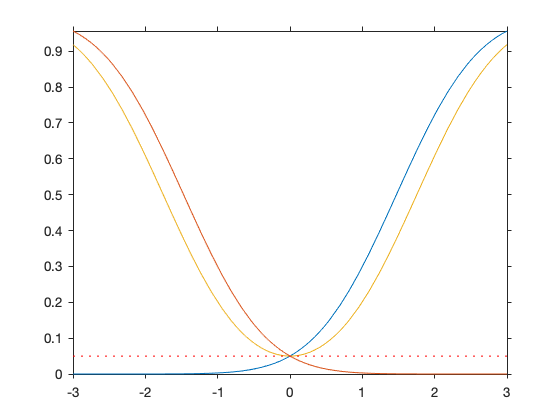

In [7]:
n = 5;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])

hold on

pow_gauss_L = @(mu) normcdf(-norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_L, [-3,3])

pow_gauss_2 = @(mu) 1 - normcdf( norminv(1-a0/2)  - sqrt(n) .*(mu - mu0) ./ sigma) +  normcdf(norminv(a0/2) - sqrt(n) .*(mu-mu0) ./sigma);
fplot(pow_gauss_2, [-3,3])


hline(0.05)
hold off


### Example 4.15 Gauss test, power function

Compare $n = 5$ with $n = 50$.

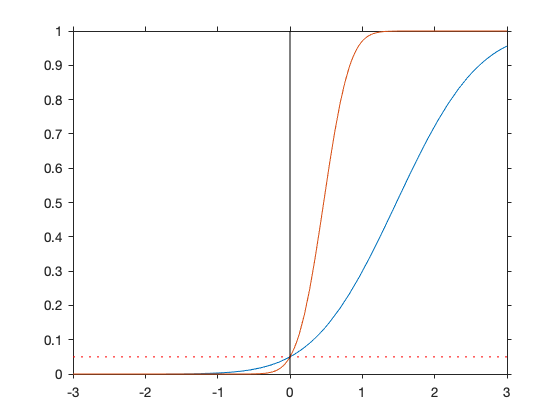

In [8]:
a0 = 0.05;
mu0 = 0;
sigma = 2;
n = 5;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
n = 50;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off

Compare $\sigma = 2$ with $\sigma = 4$.

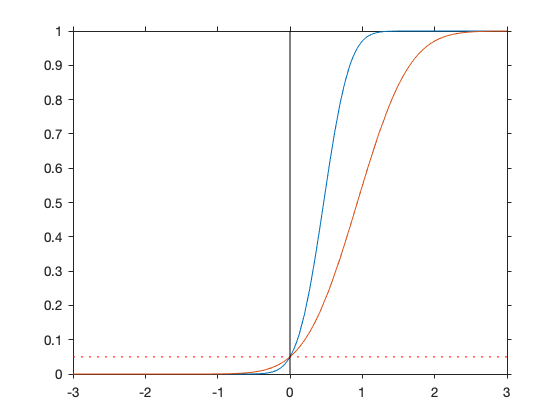

In [9]:
n = 50;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
sigma = 4;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off


Compare $\alpha_0 = 0.05$ with $\alpha_0 = 0.10$.

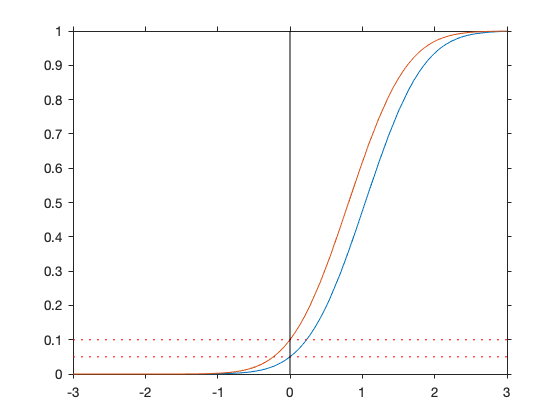

In [10]:
n = 10;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
hline(a0)
a0 = 0.1;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0, '-k')
hold off

### Example 4.16

Solution of the system to find the minimal sample size.

In [11]:
syms n positive
solve((n+1)/2 + 1.645 * sqrt(n)/2 - n *0.6 - 1/2 + 0.842 *sqrt(n*0.24), n)

ans =
((421*6^(1/2))/250 + 329/40)^2


In [12]:
eval(ans)

ans =
  152.5210


###  Example 4.18 Contaminated pool water

Transform $H_0: p_\mu \le 0.05$ where $p_\mu = P_\mu (X > 100)$ into $H_0': \mu \le 85.05$.

In [13]:

syms mu positive
fzero(@(mu) poissinv(0.95, mu) - 100.5, 50)

ans =
   85.0571


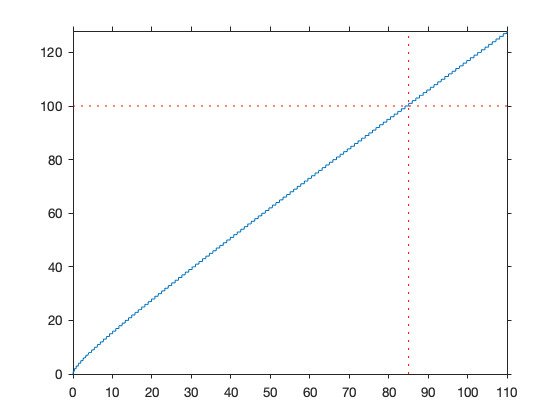

In [14]:

fplot(@(mu) poissinv(0.95, mu), [0, 110])
hline(100)
vline(85.0571)

### Example from Altman
Daily intake in KJ for 11 women.

In [2]:
daily_intake = [5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770];

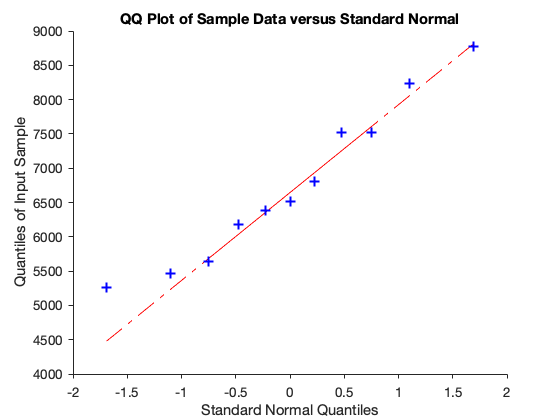

In [3]:
qqplot(daily_intake)

Test that $H_0: \mu \le 6000$ against $H_1: \mu > 6000$

In [4]:
[H, p, ~, stats] = ttest(daily_intake, 6000, 'tail', 'right')

H =
     1
p =
    0.0267
stats = 
  struct with fields:

    tstat: 2.1885
       df: 10
       sd: 1.1421e+03


In [5]:
sqrt(11) * (mean(daily_intake) - 6000)/std(daily_intake)

ans =
    2.1885


In [6]:
pval = 1-tcdf(2.1885,10)

pval =
    0.0267


In [7]:
pval_n = 1 - normcdf(2.1885)

pval_n =
    0.0143


### Example. Sign test
Sign test for the hypothesis $H_0 : \mu \le 6000$ where $\mu$ is now the median.

In [8]:
sign(daily_intake - 6000)

ans =
    -1    -1    -1     1     1     1     1     1     1     1     1


In [13]:
pval = 1-binocdf(7, 11, 1/2)

pval =
    0.1133


In [14]:
[p,H] = signtest(daily_intake, 6000,'tail','right')

p =
    0.1133
H =
  logical
   0
